In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("train.csv")
pd.set_option('display.max_rows', 500)

# Context

We're to analyze synthetic (though based on real data) dataset of Titanic passengers. Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time.<br><br>
There are 11 variables in the dataset:<br>
PassengerId [categorial]<br>
Survived [categorial] (0 = No, 1 = Yes)<br>
Pclass [categorial] (ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd)<br>
Sex	[categorial]<br>
Age	[quantitative] (age in years)<br>
SibSp [quantitative] (number of siblings / spouses aboard the Titanic)<br>
Parch [quantitative] (number of parents / children aboard the Titanic)<br>
Ticket [categorial] (ticket number)<br>
Fare [quantitative]	(passenger fare)<br>
Cabin [categorial] (cabin number)<br>
Embarked [categorial] (port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>
That makes a total of 4 quantitative variables and 7 categorial variables.

### General view

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


# Data quality assessment

### Number of rows, columns and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Total number of observations: 100 000. Missing values are present.

### Duplicate entries

In [4]:
print(f"Number of duplicates: {df.drop(columns=['PassengerId']).duplicated().sum()}")

Number of duplicates: 0


There are no exact duplicates. But what about people with same name, sex, age, embarkation port, ticket class and survival status?


In [5]:
print(f"Number of duplicates by name, sex, age, embarkation port, ticket class and survival: {df.duplicated(subset=['Name', 'Sex', 'Age', 'Embarked', 'Pclass', 'Survived']).sum()}")

Number of duplicates by name, sex, age, embarkation port, ticket class and survival: 77


We consider these entries true duplicates and are going to remove them.

In [6]:
df.drop_duplicates(subset=['Name', 'Sex', 'Age', 'Embarked', 'Pclass', 'Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


There are also tickets with the same number which is definitely not a normal finding.

In [7]:
print(f'Unique values of [Ticket]: {round(len(df["Ticket"].unique())/len(df[df["Ticket"].notna()])*100, 2)}%')

Unique values of [Ticket]: 78.98%


### Missing data

In [8]:
missing_data = pd.DataFrame()
missing_data["missing"] = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data["missing_percent"] = missing_data["missing"]/df.shape[0]*100
missing_data

,missing,missing_percent
Cabin,67866,67.866
Ticket,4623,4.623
Age,3292,3.292
Embarked,250,0.250
Fare,134,0.134


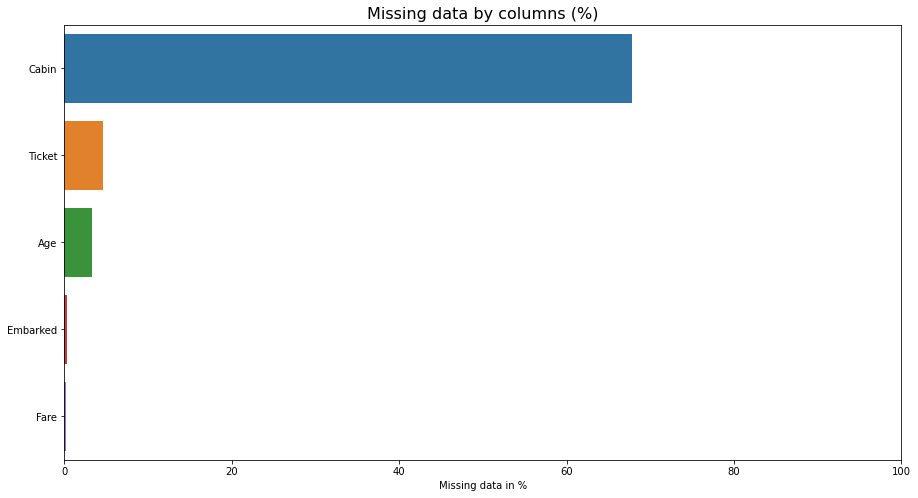

In [9]:
plt.figure(figsize=(15,8))
plt.xlim(0, 100)
sns.barplot(x=missing_data.missing_percent, y=missing_data.index, orient="h").set_title("Missing data by columns (%)", fontsize=16);
plt.xlabel("Missing data in %");

### Dealing with missing values

#### Cabin

Due to high share of missing values (67.9%) we've decided to abstain from imputations and exclude the column from the dataset (for now at least).

In [10]:
df.drop(columns="Cabin", inplace=True)

#### Ticket

In [11]:
df.iloc[::5000, :].Ticket

0                   209245
5000                221581
10000                A/5. 
15000               307486
20000                27531
25000               433013
30000            PC 411047
35000               320922
40000    SOTON/O.Q. 409656
45000                  NaN
50000               199215
55000               425244
60000                30304
65000             PC 26049
70000                26650
75000            A/S 22410
80000                38825
85000      SC/PARIS 488527
90000      SC/Paris 469606
95000             A. 20931
Name: Ticket, dtype: object

Since [Ticket] values are represented in many different formats we've decided to abstain from imputations. No actions regarding missing values have been performed.

#### Age

Our best guess is that passenger's age may have corellation with the number of relatives on board or with the cabin class. 

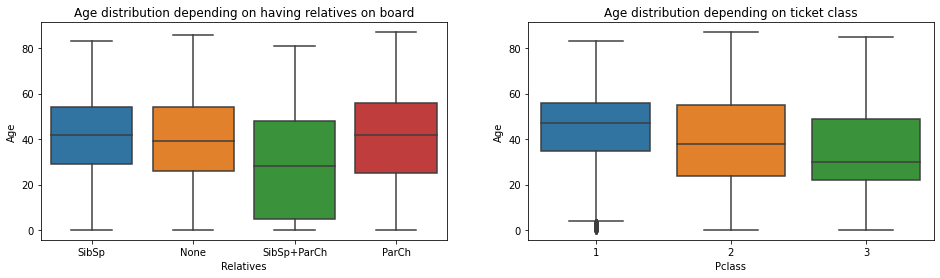

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
df.loc[(df.SibSp > 0) & (df.Parch > 0), "Relatives"] = "SibSp+ParCh"
df.loc[(df.SibSp == 0) & (df.Parch > 0), "Relatives"] = "ParCh"
df.loc[(df.SibSp > 0) & (df.Parch == 0), "Relatives"] = "SibSp"
df.loc[(df.SibSp == 0) & (df.Parch == 0), "Relatives"] = "None"
sns.boxplot(x=df.Relatives, y=df.Age, ax=ax[0]);
ax[0].set_title("Age distribution depending on having relatives on board");
sns.boxplot(x=df.Pclass, y=df.Age, ax=ax[1]);
ax[1].set_title("Age distribution depending on ticket class");

Even though there are differences between groups, their significance is unclear. Still, we'll use these findings to perform imputations of mean values in groups from above combined (a total of 12).

In [13]:
for Pclass in (1, 2, 3):
    df.loc[(df.Age.isna() & (df.SibSp > 0) & (df.Parch > 0) & (df.Pclass == Pclass)), "Age"] = df[(df.SibSp > 0) & (df.Parch > 0) & (df.Pclass == Pclass)]["Age"].mean()
    df.loc[(df.Age.isna() & (df.SibSp == 0) & (df.Parch > 0) & (df.Pclass == Pclass)), "Age"] = df[(df.SibSp == 0) & (df.Parch > 0) & (df.Pclass == Pclass)]["Age"].mean()
    df.loc[(df.Age.isna() & (df.SibSp > 0) & (df.Parch == 0) & (df.Pclass == Pclass)), "Age"] = df[(df.SibSp > 0) & (df.Parch == 0) & (df.Pclass == Pclass)]["Age"].mean()
    df.loc[(df.Age.isna() & (df.SibSp == 0) & (df.Parch == 0) & (df.Pclass == Pclass)), "Age"] = df[(df.SibSp == 0) & (df.Parch == 0) & (df.Pclass == Pclass)]["Age"].mean()
df.drop(columns="Relatives", inplace=True)    

#### Embarked

In [14]:
df.value_counts("Embarked").reset_index()

,Embarked,0
0,S,72139
1,C,22187
2,Q,5424


Due to low count of non-existant values in [Embarked] column (0.25%) we've taken a simple approach to imputations: since S/C ratio is roughly 2/1, passengers with [PassengerId] value that is divisible by 3 have been assigned with "C" [Embarked] value, and the others with "S" value ("Q" is ignored as its share is only about 5%).

In [15]:
df.loc[(df["Embarked"].isna()) & (df["PassengerId"] % 3 == 0), "Embarked"] = "C"
df.loc[(df["Embarked"].isna()) & (df["PassengerId"] % 3 != 0), "Embarked"] = "S"

#### Fare

[Fare] values are missing in only 0.13% of observations. We've filled these fields simply with the median of [Fare] (not mean because the distribution is skewed, which we'll see in a minute).

In [16]:
df.loc[(df["Fare"].isna()), "Fare"] = df["Fare"].median()

### Changing value types

In [17]:
df.loc[:, "Female"] = pd.factorize(df["Sex"])[0]
df.drop(columns="Sex", inplace=True)

[Sex] is a binary categorical value. We have converted it to 0/1 [Female].

### Deleting non-significant columns

It's obvious that [PassengerId] holds no data and is simply an index. At this point we also believe that [Name] and [Ticket] columns are of no use anymore as they hold mostly unique values. The final state of the dataframe is displayed at the bottom.

In [18]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female
0,1,1,43.736354,2,0,27.14,S,0
1,0,3,36.360302,0,0,13.35,S,0
2,0,3,0.330000,1,2,71.29,S,0
3,0,3,19.000000,0,0,13.04,S,0
4,1,3,25.000000,0,0,7.76,S,0


# Data exploration

### Quantative values analysis

In [19]:
df.loc[:, ["Age", "SibSp", "Parch", "Fare"]].describe()

,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,38.357134,0.397690,0.454560,43.903241
std,18.049786,0.862566,0.950076,69.545827
min,0.080000,0.000000,0.000000,0.680000
25%,25.000000,0.000000,0.000000,10.040000
50%,39.000000,0.000000,0.000000,24.460000
75%,53.000000,1.000000,1.000000,33.470000
max,87.000000,8.000000,9.000000,744.660000


Mean age of passengers was 39 years, the youngest one was 1 month old and the oldest one was 87 years old. Most passengers (> 75%) were on board with no more than 2 family members. While mean fare was 43.9 (and median even less - 24.5), maximum value is much larger (744.7). Such cost could be appropriate for luxury cabins.

### Correlation overview

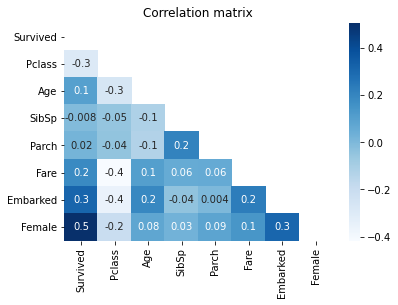

In [20]:
df_corr = df.copy()
df_corr.loc[:, "Embarked"] = pd.factorize(df["Embarked"])[0]
mask = np.triu(df_corr.corr())
heatmap = sns.heatmap(df_corr.corr(), annot=True, cmap="Blues", fmt='.1g', mask=mask).set(title="Correlation matrix")

Later we'll adjust the heatmap since at this point it contains categorical values with more than two possible states. However, we can still conclude that close attention must be paid to correlation between survival and passenger's gender, ticket class and embarkation port.

### Feature: Survived

[Survived] may be considered to be an end-point. Correlation between this variable and all the others will be discussed further. Here we present only a simple distribution between survived and deceased.

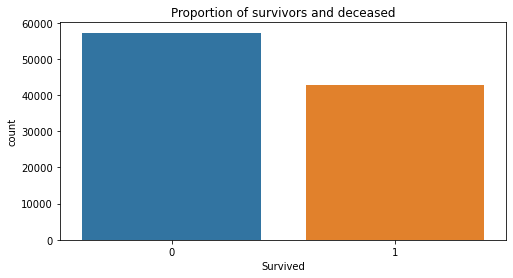

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x="Survived", data=df).set(title="Proportion of survivors and deceased");

### Feature: Pclass

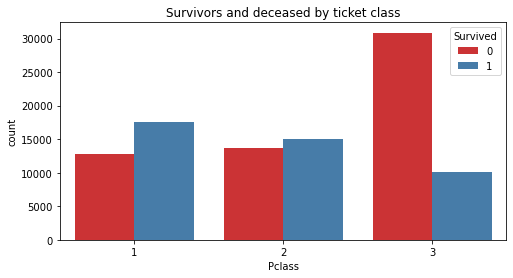

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1").set(title="Survivors and deceased by ticket class");

The total number of passengers from classes 1 and 2 is lower than that of class 3. More than half of passengers from classes 1 and 2 survived while only a quarter or so survived from class 3. We know that passengers with class 3 tickets were located at lower decks and thus had less chances to make it to the lifeboats.<br><br>
We may assume that there is a correlation between person's age and ticket class. Let's investigate that.

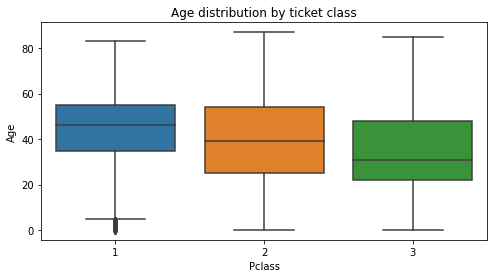

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Pclass", y="Age", data=df).set(title="Age distribution by ticket class");

Indeed, mean age of passengers progressively increases with their tickets class (3 -> 1). Our best guess is that older people are generally more well-off and may afford a better cabin.<br><br>
From the correlation heatmap we see that there is some low/moderate correlation betweeen [Pclass] and [Fare, Embarked]. This first one is easily explained by the simple fact that better tickets usually cost more.

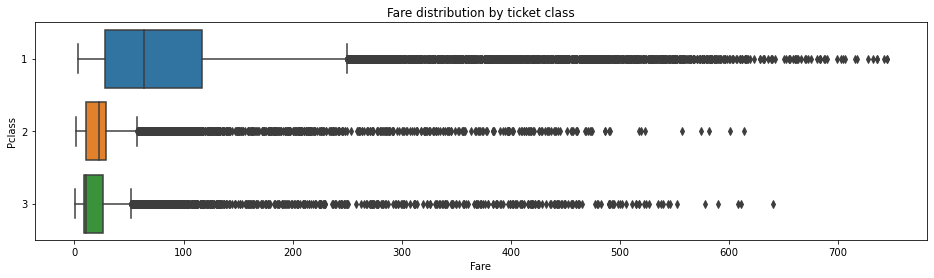

In [24]:
plt.figure(figsize=(16,4))
sns.boxplot(y="Pclass", x="Fare", data=df, orient="h").set(title="Fare distribution by ticket class");

From the graph not only we confirm this observation, but also see that we'll encounter many outliers in [Fare].

Some correlation with [Embarked] would not be surprising, since passengers from one city (port) may be generally more well-off than passengers from some other city.

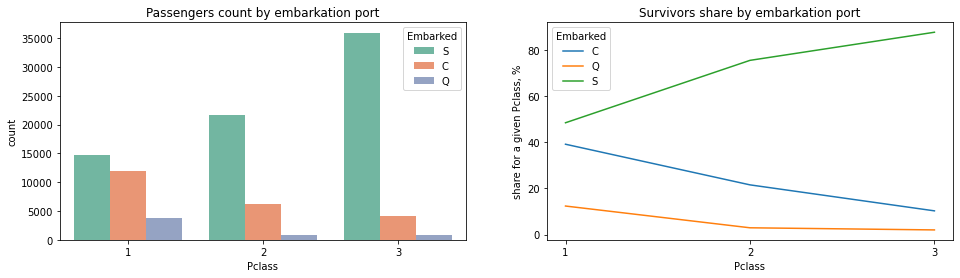

In [25]:
pclass_emb_distr = (df.groupby(by=["Pclass", "Embarked"]).count()/df.groupby(by=["Pclass"]).count()*100).iloc[:, 0].reset_index()
pclass_emb_distr["Pclass"] = pclass_emb_distr["Pclass"].astype(str)
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x="Pclass", hue="Embarked", data=df, palette="Set2", ax=ax[0]).set(title="Passengers count by embarkation port");
sns.lineplot(x="Pclass", y="Age", hue="Embarked", data=pclass_emb_distr, ax=ax[1]).set(title="Survivors share by embarkation port");
ax[1].set(ylabel="share for a given Pclass, %");

We believe that using Pearson/Spearman ratio for Pclass correlation is invalid. Instead, to measure correlation using these methods we'll introduce [First], [Second] and [Third] binary features (the last one is probably excessive?) and re-measure correlation coefficients.

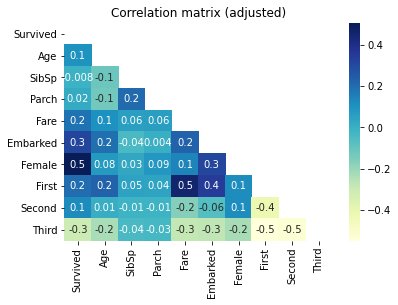

In [26]:
df["First"]=np.where(df["Pclass"] == 1, 1, 0)
df["Second"]=np.where(df["Pclass"] == 2, 1, 0)
df["Third"]=np.where(df["Pclass"] == 3, 1, 0)
df_corr = df.copy()
df_corr.drop(columns="Pclass", inplace=True)
df_corr.loc[:, "Embarked"] = pd.factorize(df["Embarked"])[0]
mask = np.triu(df_corr.corr())
heatmap = sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu", fmt='.1g', mask=mask).set(title="Correlation matrix (adjusted)");

Here we can see that correlation between survival and ticket class isn't strong, but it's direction is now evident: travelling in classes 1 and 2 is associated with increased survival, while the opposite is true for class 3. It's also worth notice that a female passenger had more chances to travel in class 1 or 2 rather than in class 3.

### Feature: Age

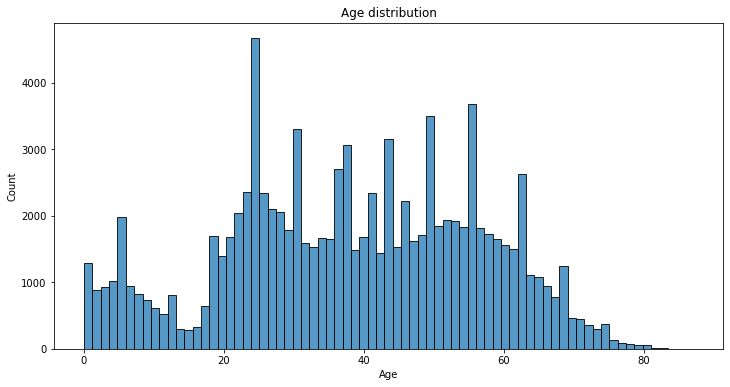

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(x="Age", data=df).set(title="Age distribution");

It's evident from the plot that [Age] doesn't have normal distribution. From correlation heatmap we can see that higher age is associated with a slightly better survival (r=0.1). Let's illustrate differences in [Age] distributions of those who survived and those who did not.

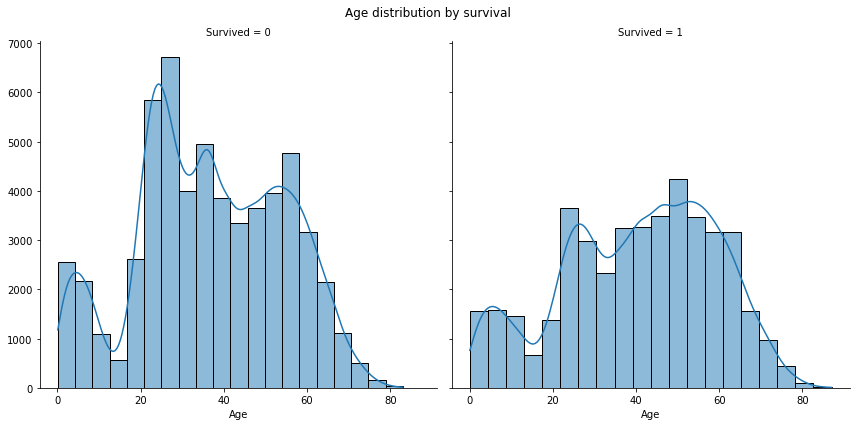

In [58]:
plot = sns.FacetGrid(df, col="Survived", height=6);
plot.map(sns.histplot, "Age", bins=20, kde=True);
plot.fig.subplots_adjust(top=0.9);
plot.fig.suptitle("Age distribution by survival");

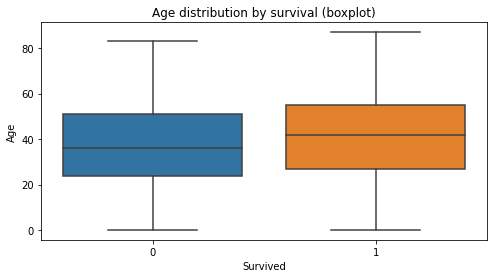

In [60]:
plt.figure(figsize=(8,4))
sns.boxplot(y="Age", x="Survived", data=df).set(title="Age distribution by survival (boxplot)");

In [30]:
print(f'Mean age of survivors: {round(df.loc[df["Survived"] == 0, "Age"].mean(), 2)}')
print(f'Mean age of deceased: {round(df.loc[df["Survived"] == 1, "Age"].mean(), 2)}')
print(f'Median age of survivors: {round(df.loc[df["Survived"] == 0, "Age"].median(), 2)}')
print(f'Median age of deceased: {round(df.loc[df["Survived"] == 1, "Age"].median(), 2)}')

Mean age of survivors: 36.73
Mean age of deceased: 40.53
Median age of survivors: 36.0
Median age of deceased: 42.0


Both mean and median age of survivors is larger. This may very well be due to larger mean/median age of passengers who had class 1 and 2 tickets. And we already know that better ticket class was associated with better survival.<br><br>
There are some peaks in distributions presented above: 0-5 years, 20-30 years and 50-60 yrs for non-survivors and 0-10, 25-30 and 45-55 for survivors. Based on that we'll introduce the following age categories: 0-10 years (children), 10-20 years (adolescents), 20-40 (young adults), 40-60 (old adults), 60-90 (elderly).

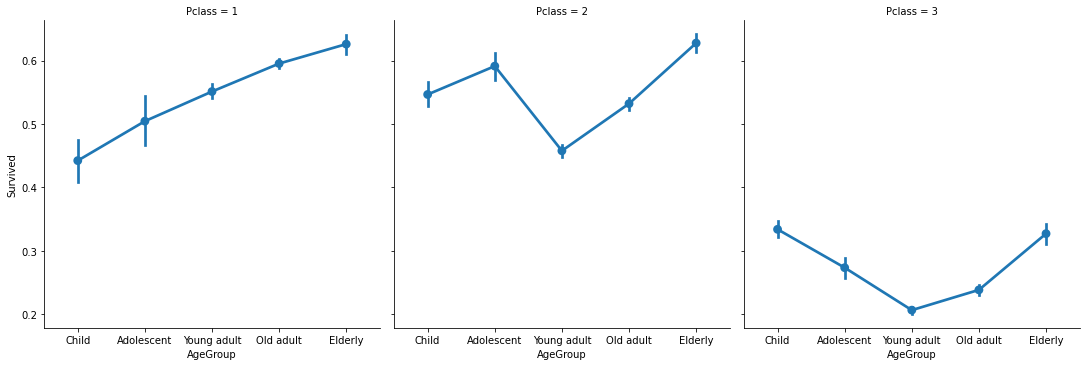

In [64]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 10, 20, 40, 60, 90], labels=["Child", "Adolescent", "Young adult", "Old adult", "Elderly"])
sns.catplot(x="AgeGroup", y="Survived", col="Pclass", data=df, kind="point");

As we can see, elderly people had uniformly better chances to survive. Second better chances for class 1 had old adults, adolescents for class 2 and children for class 3. Young adults from class 2 and 3 had the least chances to survive (among theit classes). Such differences does not meet famous "Women and children first" rule (at least for the "children" part). We may assume that passengers from different classes may had different approaches in determining who is to board a lifeboat. That is especially true for class 1 passengers.

### Feature: Sex

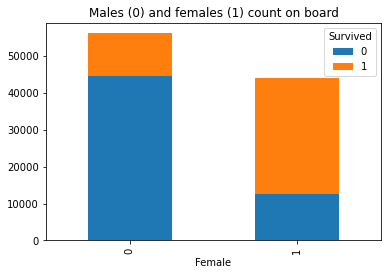

In [69]:
df.groupby(["Female", "Survived"]).count()["Age"].unstack().plot.bar(stacked=True).set(title="Males (0) and females (1) count on board");

There were less females on board, but their chances of survival were significantly higher, so it seems that the "women" part of the "Women and children first" rule applies to our dataset. Let's continue investigations.

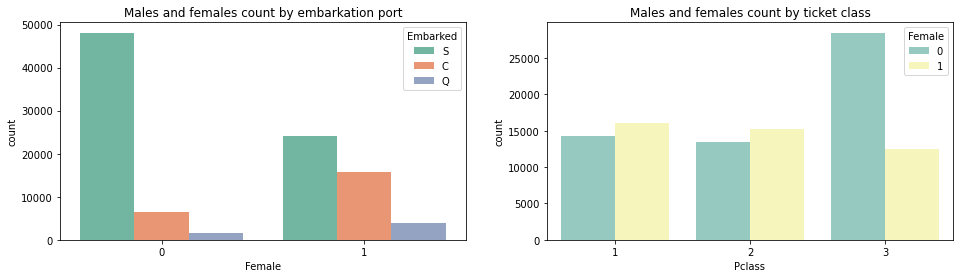

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x="Female", hue="Embarked", data=df, palette="Set2", ax=ax[0]).set(title="Males and females count by embarkation port");
sns.countplot(x="Pclass", hue="Female", data=df, palette="Set3", ax=ax[1]).set(title="Males and females count by ticket class");

While almost all men embarked in Southampton, distribution of women by the port of embarkation is more even for "S" and "C" ports. In classes 1 and 2 numbers of men and women are almost even with a slight prevalence of women. On the contrary, in class 3 males prevail. This isn't unexpected, since poor passengers were often young males who were looking for new jobs and opportunities abroad.

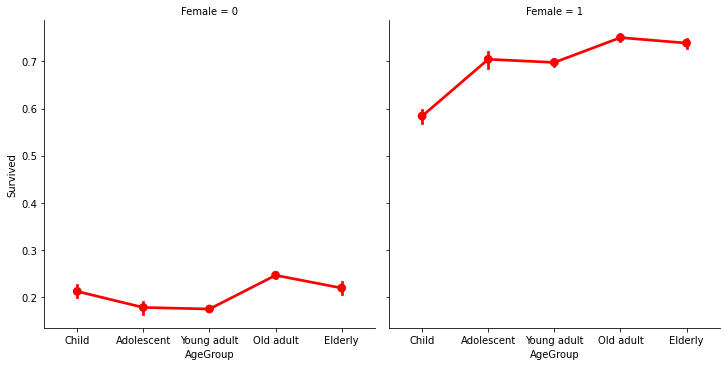

In [34]:
sns.catplot(x="AgeGroup", y="Survived", col="Female", data=df, kind="point", color="red");

This illustrates an astonishing difference between chances of men and women for survival. Among age groups least chances of survival had young adults and adolescents amone males, children and young adults among females. Best chances between all groups and sexes had female old adults.

### Features: SibSp/ParCh

Mean SibSp: 0.39769
Mean ParCh: 0.45456


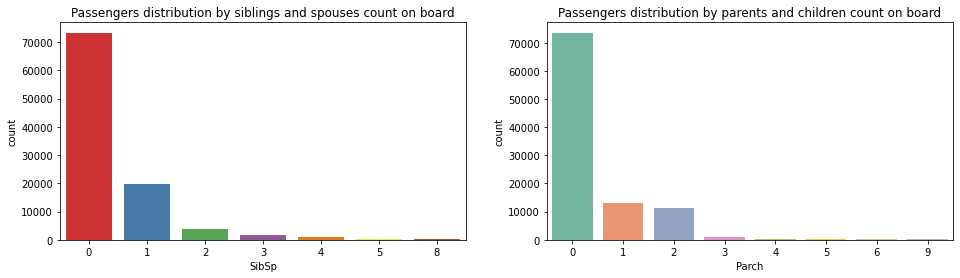

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x="SibSp", data=df, palette="Set1", ax=ax[0]).set(title="Passengers distribution by siblings and spouses count on board");
sns.countplot(x="Parch", data=df, palette="Set2", ax=ax[1]).set(title="Passengers distribution by parents and children count on board");
print(f"Mean SibSp: {df['SibSp'].mean()}")
print(f"Mean ParCh: {df['Parch'].mean()}")

Most passengers had no relatives on board. Mean value of SibSp number was 0.398 and mean value of ParCh was 0.455. 

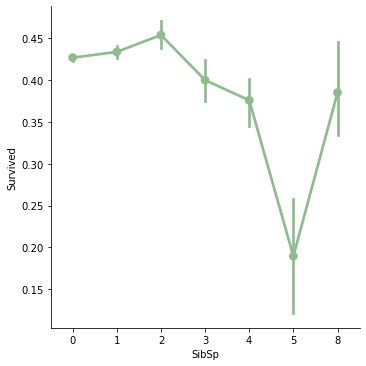

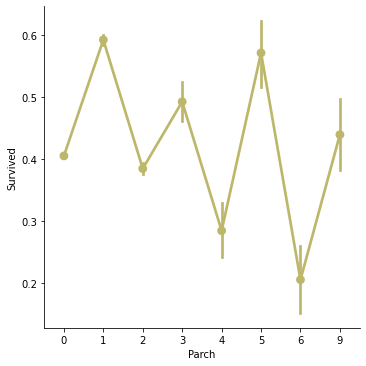

In [36]:
sns.catplot(x="SibSp", y="Survived", data=df, kind="point", color="darkseagreen");
sns.catplot(x="Parch", y="Survived", data=df, kind="point", color="darkkhaki");

Having two (siblings+spouses) was associated with better surival, while for (parents+children) the best value was one.<br><br>
Let's investigate how the number of family companions (SibSp + Parch) on board affected survival. We'll introduce the following categories for [Family] feature: alone (0), pair (1), Small (2-4), Large (5+).

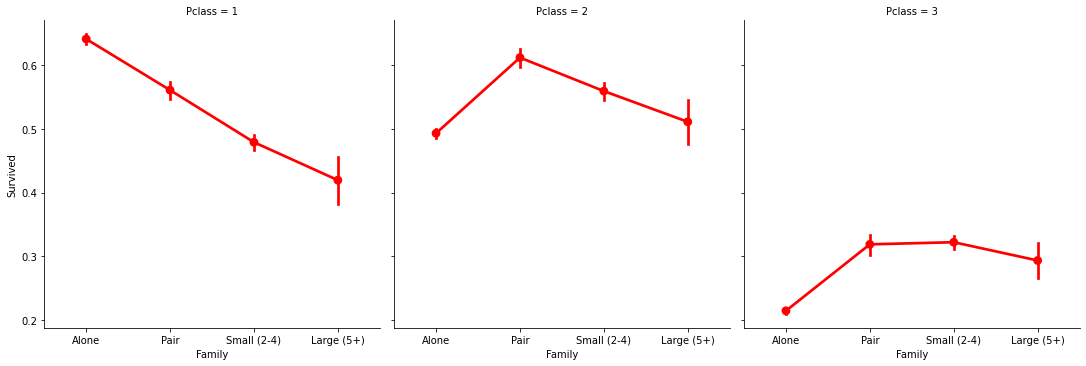

In [76]:
df["Family"] = pd.cut(df["SibSp"]+df["Parch"], bins=[0, 1, 2, 5, 20], right=False, labels=["Alone", "Pair", "Small (2-4)", "Large (5+)"])
sns.catplot(x="Family", y="Survived", col="Pclass", data=df, kind="point", color="red");

In class 1 most chances had those who were alone. Travelling with family decreased chances of survival. In classes 2 and 3 having someone by your side slightly increased chances of survival, though a large family (5 and more members) gave only a slight advantage.

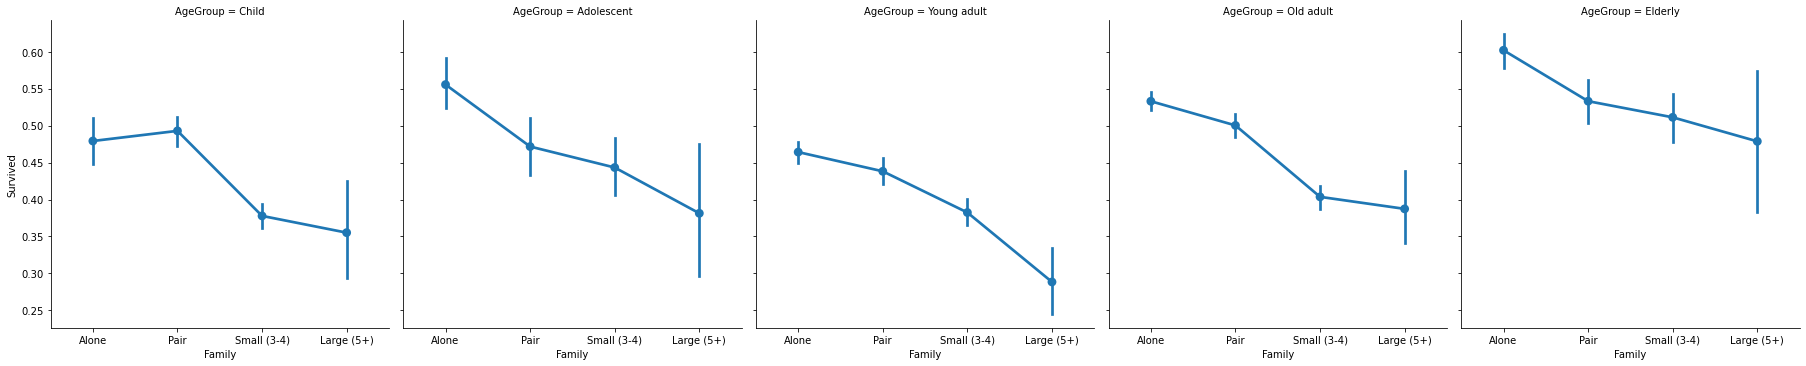

In [38]:
sns.catplot(x="Family", y="Survived", col="AgeGroup", data=df, kind="point");

No much difference between age groups. Even children (0-10 years) had better chances of survival when they were alone ore with just one relative. Same applies and for the other age groups.

### Feature: Fare

[Fare] has the strongest correlation with the ticket class, which is easily explained. It also have some very slight correlation with survival, but we believe it to be secondary to ticket class correlation.<br><br>

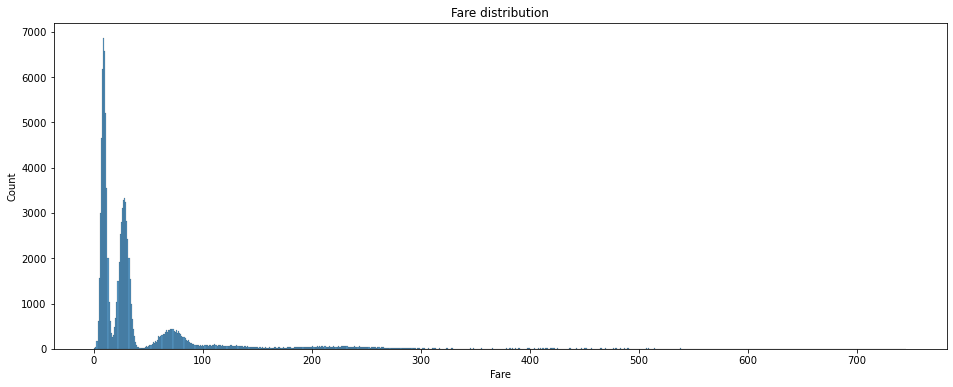

In [78]:
plt.figure(figsize=(16,6))
sns.histplot(x="Fare", data=df).set(title="Fare distribution");

Fare distribution has three peaks at approximately 10, 30 and 70 with many outliers.

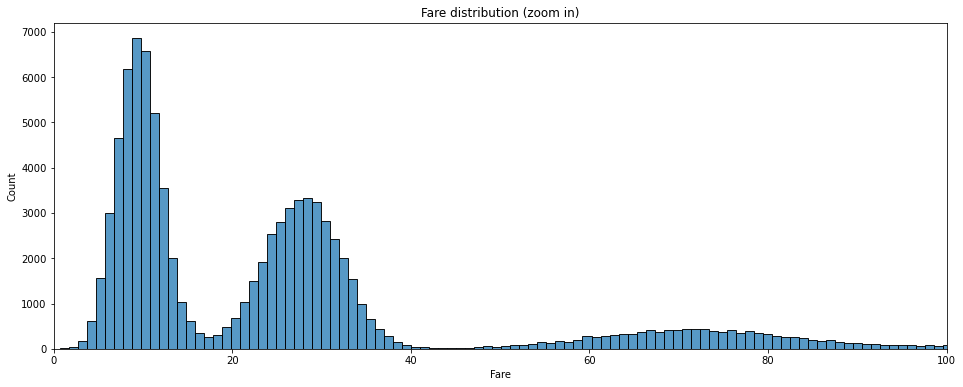

In [77]:
plt.figure(figsize=(16,6))
plt.xlim(0, 100)
sns.histplot(x="Fare", data=df).set(title="Fare distribution (zoom in)");

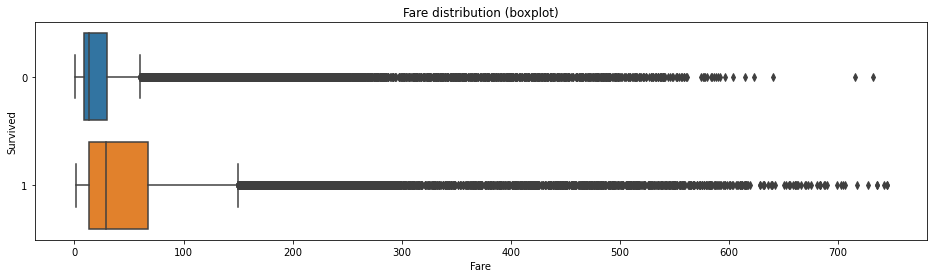

In [79]:
plt.figure(figsize=(16,4))
sns.boxplot(x="Fare", y="Survived", data=df, orient="h").set(title="Fare distribution (boxplot)");

As was expected, on average survivors paid for their tickets more.

### Feature: Embarked

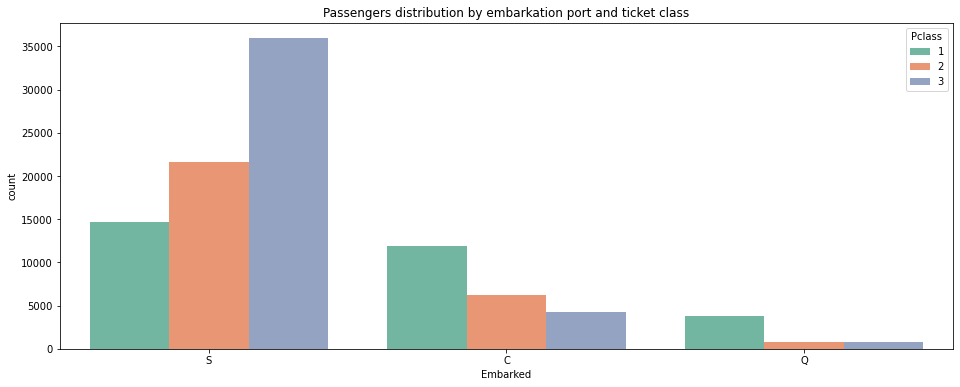

In [80]:
plt.figure(figsize=(16,6))
sns.countplot(x="Embarked", hue="Pclass", data=df, palette="Set2").set(title="Passengers distribution by embarkation port and ticket class");

We've already mentioned how [Embarked] relates to passenger class and sex. Let's see if there is correlation between other variables. For this purposes we'll update heatmap with binary columns.

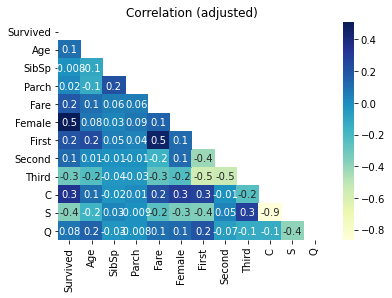

In [81]:
df["C"]=np.where(df["Embarked"] == "C", 1, 0)
df["S"]=np.where(df["Embarked"] == "S", 1, 0)
df["Q"]=np.where(df["Embarked"] == "Q", 1, 0)
df_corr = df.copy()
df_corr.drop(columns=["Embarked", "Pclass"], inplace=True)
mask = np.triu(df_corr.corr())
heatmap = sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu", fmt='.1g', mask=mask).set(title="Correlation (adjusted)")

There is low to moderate correlation between embarkation port (C or S) and survival. No other significant correlations were found.<br>
Survival dependence on embarkation port is illustrated below.

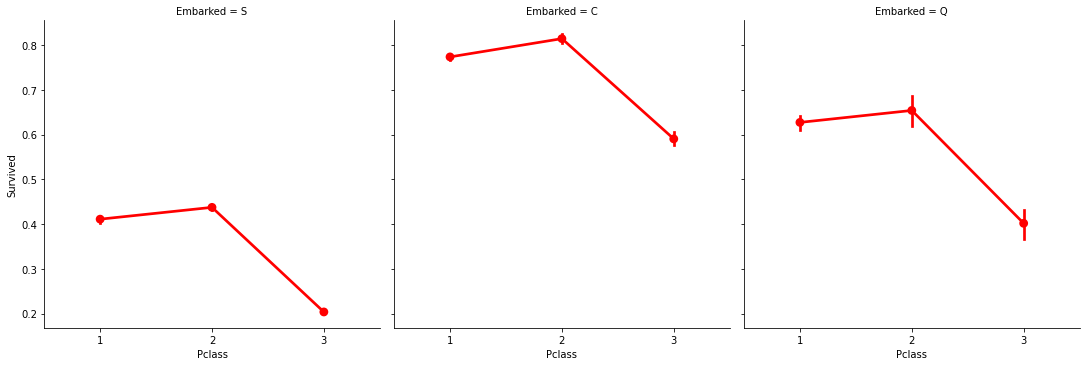

In [44]:
sns.catplot(x="Pclass", y="Survived", col="Embarked", data=df, kind="point", color="red");

From the last chart we can see that [Embarked] may very well affect survival independently of ticket class (even though the pattern is the same among embarkation ports, survival rates differ significantly).

# Summary